# GRIP:The Sparks Foundation

## Data Science and Buisness Analytics 

## Author: Snehlata Topno

## Task 1: Prediction using Supervised ML

 _**In this task,we have to predict the percentage of marks an student is expected to score based on the no. of study hours. This is a simple linear regression task, involving just 2 variables.**_

In [60]:
# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Importing required libraries

In [61]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Dataset

In [62]:
#Reading data from the remote link
url = 'http://bit.ly/w-data'
dataset = pd.read_csv(url)
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [63]:
# Inspect the various aspects of our dataset

print("Rows :",dataset.shape[0])
print("Columns :",dataset.shape[1])

Rows : 25
Columns : 2


In [64]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [65]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualization of dataset

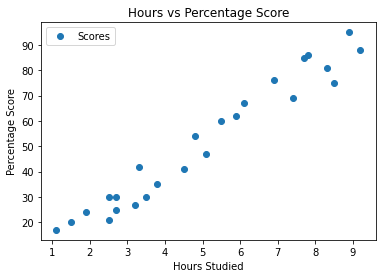

In [66]:
# Plotting the distribution of scores
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that no outlier is found and  there is a positive linear relation between the number of hours studied and percentage of score.**

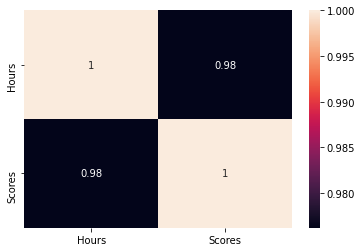

In [67]:
# To check for Correlation

sns.heatmap(dataset.corr(),annot=True)
plt.show()

**Here we infer that Hours and Scores are highly Positively correlated to each other**


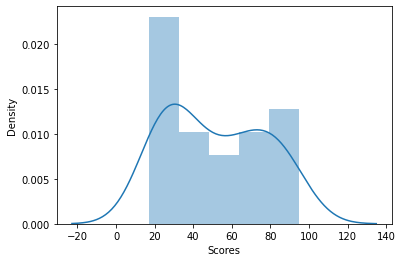

In [68]:
# To check for distribution of Scores in the dataset

sns.distplot(dataset['Scores'], bins=5)
plt.show()

**Almost normally distributed with skew in the positive side Hence, we can perform a LINEAR REGRESSION to predict the value**

### Preparing the data
This step is to divide the data into "attributes" (inputs) and "labels" (outputs).



In [69]:
x = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [87]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=42) 

### Training the Algorithm

We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [88]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


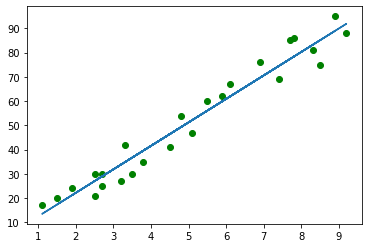

In [89]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y,c='g')
plt.plot(x, line);
plt.show()

In [90]:
#Checking Accuracy Scores for both training as well as testing sets
print("Training Score:",regressor.score(x_train,y_train)*100)
print("Testing Score:",regressor.score(x_test,y_test)*100)

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


### Making Predictions



Now that we have trained our algorithm, it's time to make some predictions.

In [91]:
print("y_test :")
print(y_test)
print()
print("x_test :")
print(x_test)

y_test :
[81 30 21 76 62]

x_test :
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [92]:
y_pred = regressor.predict(x_test) # Predicting the scores
print("y_pred :")
print(y_pred)

y_pred :
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [93]:
# Comparing Actual vs Predicted
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [94]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494



After Analysing the dataset we got Predicted score around 92 based on the number of study hours i.e., 9.25 hrs/day.

### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. 

In [95]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 3.9207511902099244


_**Thank you**_